In [7]:
%matplotlib inline
import seaborn as sns
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

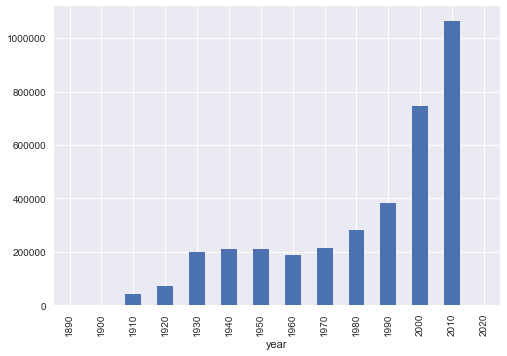

In [8]:
c = cast
c.groupby(c.year // 10 *10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

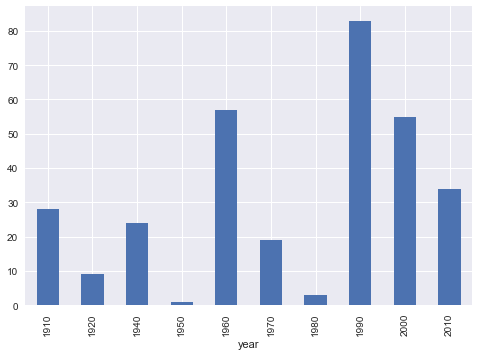

In [12]:
c = cast
c = c[c.title=='Hamlet']
c.groupby(c.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [15]:
c = cast
c = c[c.year == 1950]
c = c[c.n==1]
c.groupby(c.type).size()

type
actor      621
actress    279
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [20]:
c = cast
c = c[(c.year // 10 * 10) == 1950]
c = c[(c.n >= 1) & (c.n <= 5)]
c.groupby(['year', 'type']).size().unstack('type')

type,actor,actress
year,,
1950,2638,1494
1951,2806,1503
1952,2629,1526
1953,2810,1618
1954,2645,1544
1955,2710,1571
1956,2743,1586
1957,3033,1747
1958,2924,1677


### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [24]:
c = cast
c = c[c.title.str.contains('Pink Panther')]
c.groupby(['title']).size()

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        64
Son of the Pink Panther            46
The Pink Panther                  110
The Pink Panther 2                 84
The Pink Panther Strikes Again     68
The Return of the Pink Panther     30
Trail of the Pink Panther          41
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [36]:
c = cast
c = c[c.name == 'Frank Oz']
c = c.groupby(['year', 'title']).size()
c[c>1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [40]:
c = cast
c = c[c.name == 'Frank Oz']
c = c.groupby('character').size()
c[c>1].sort_values(ascending=False)

character
Yoda              6
Miss Piggy        6
Animal            6
Sam the Eagle     5
Fozzie Bear       4
Cookie Monster    3
Bert              3
Grover            2
dtype: int64